# a

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

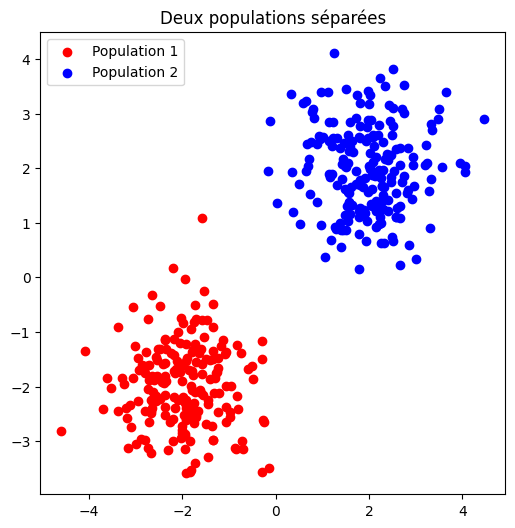

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Génération de deux populations bien séparées
X, y = make_blobs(
    n_samples=400,       # nombre total d'échantillons
    centers=[[-2, -2], [2, 2]],  # positions des centres
    cluster_std=0.8,     # écart-type (plus petit = plus séparé)
    random_state=42
)

# Visualisation
plt.figure(figsize=(6,6))
plt.scatter(X[y==0, 0], X[y==0, 1], c="red", label="Population 1")
plt.scatter(X[y==1, 0], X[y==1, 1], c="blue", label="Population 2")
plt.legend()
plt.title("Deux populations séparées")
plt.show()



=== RAPPORT DE CLASSIFICATION ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        42

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

=== MATRICE DE CONFUSION ===
[[38  0]
 [ 0 42]]

=== PRÉCISION GLOBALE ===
Accuracy: 1.000


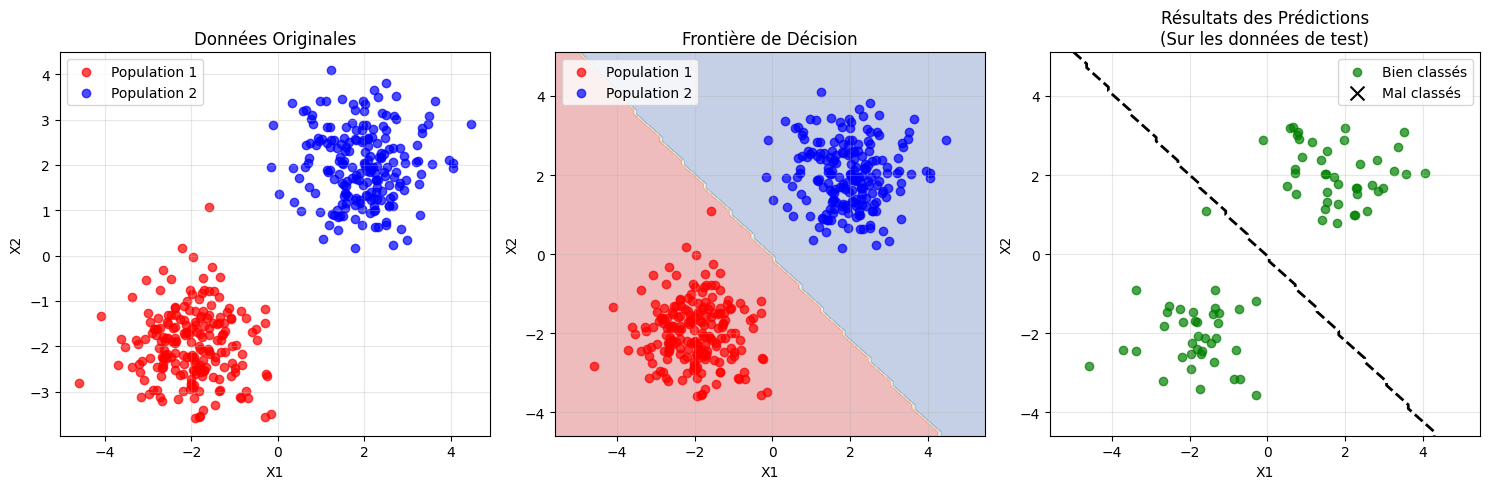


=== COEFFICIENTS DU MODÈLE ===
Intercept (biais): 0.135
Coefficient pour X1: 1.783
Coefficient pour X2: 1.712

=== ÉQUATION DE LA FRONTIÈRE ===
1.783*X1 + 1.712*X2 + 0.135 = 0

=== EXEMPLE DE PROBABILITÉS ===
Quelques prédictions avec leurs probabilités:
Point 1: Classe réelle = 0, Prédiction = 0
  Probabilités: [Classe 0: 1.000, Classe 1: 0.000]
Point 2: Classe réelle = 0, Prédiction = 0
  Probabilités: [Classe 0: 1.000, Classe 1: 0.000]
Point 3: Classe réelle = 0, Prédiction = 0
  Probabilités: [Classe 0: 0.999, Classe 1: 0.001]
Point 4: Classe réelle = 1, Prédiction = 1
  Probabilités: [Classe 0: 0.009, Classe 1: 0.991]
Point 5: Classe réelle = 0, Prédiction = 0
  Probabilités: [Classe 0: 0.998, Classe 1: 0.002]


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Génération de deux populations bien séparées
X, y = make_blobs(
    n_samples=400,       # nombre total d'échantillons
    centers=[[-2, -2], [2, 2]],  # positions des centres
    cluster_std=0.8,     # écart-type (plus petit = plus séparé)
    random_state=42
)

# Division en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
print("=== RAPPORT DE CLASSIFICATION ===")
print(classification_report(y_test, y_pred))

print("=== MATRICE DE CONFUSION ===")
print(confusion_matrix(y_test, y_pred))

print(f"\n=== PRÉCISION GLOBALE ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Visualisation des résultats
plt.figure(figsize=(15, 5))

# Graphique 1: Données originales
plt.subplot(1, 3, 1)
plt.scatter(X[y==0, 0], X[y==0, 1], c="red", label="Population 1", alpha=0.7)
plt.scatter(X[y==1, 0], X[y==1, 1], c="blue", label="Population 2", alpha=0.7)
plt.legend()
plt.title("Données Originales")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True, alpha=0.3)

# Graphique 2: Frontière de décision
plt.subplot(1, 3, 2)
# Création d'une grille pour la frontière de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prédictions sur la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracé de la frontière de décision
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[y==0, 0], X[y==0, 1], c="red", label="Population 1", alpha=0.7)
plt.scatter(X[y==1, 0], X[y==1, 1], c="blue", label="Population 2", alpha=0.7)
plt.legend()
plt.title("Frontière de Décision")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True, alpha=0.3)

# Graphique 3: Prédictions vs Réalité
plt.subplot(1, 3, 3)
# Points bien classés et mal classés
correct_mask = (y_pred == y_test)
incorrect_mask = ~correct_mask

plt.scatter(X_test[correct_mask, 0], X_test[correct_mask, 1],
           c="green", label="Bien classés", alpha=0.7)
plt.scatter(X_test[incorrect_mask, 0], X_test[incorrect_mask, 1],
           c="black", marker="x", s=100, label="Mal classés")

# Tracé de la frontière de décision
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')

plt.legend()
plt.title("Résultats des Prédictions\n(Sur les données de test)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Affichage des coefficients du modèle
print("\n=== COEFFICIENTS DU MODÈLE ===")
print(f"Intercept (biais): {model.intercept_[0]:.3f}")
print(f"Coefficient pour X1: {model.coef_[0][0]:.3f}")
print(f"Coefficient pour X2: {model.coef_[0][1]:.3f}")

# Équation de la frontière de décision
print(f"\n=== ÉQUATION DE LA FRONTIÈRE ===")
print(f"{model.coef_[0][0]:.3f}*X1 + {model.coef_[0][1]:.3f}*X2 + {model.intercept_[0]:.3f} = 0")

# Probabilités de prédiction pour quelques exemples
print(f"\n=== EXEMPLE DE PROBABILITÉS ===")
print("Quelques prédictions avec leurs probabilités:")
for i in range(5):
    proba = model.predict_proba([X_test[i]])[0]
    print(f"Point {i+1}: Classe réelle = {y_test[i]}, Prédiction = {y_pred[i]}")
    print(f"  Probabilités: [Classe 0: {proba[0]:.3f}, Classe 1: {proba[1]:.3f}]")


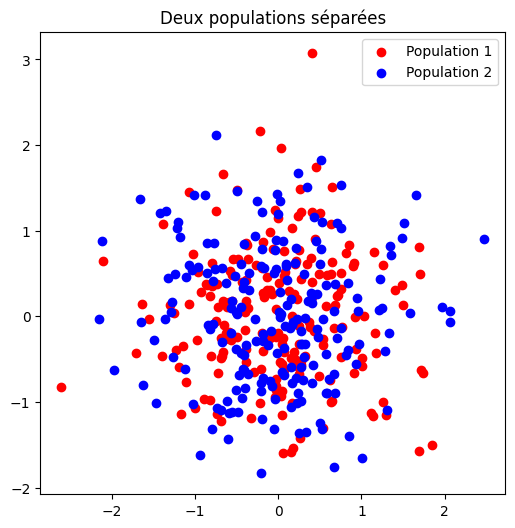

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Génération de deux populations bien séparées
X, y = make_blobs(
    n_samples=400,       # nombre total d'échantillons
    centers=[[-0.01, -0.01], [0.01, 0.01]],  # positions des centres
    cluster_std=0.8,     # écart-type (plus petit = plus séparé)
    random_state=42
)

# Visualisation
plt.figure(figsize=(6,6))
plt.scatter(X[y==0, 0], X[y==0, 1], c="red", label="Population 1")
plt.scatter(X[y==1, 0], X[y==1, 1], c="blue", label="Population 2")
plt.legend()
plt.title("Deux populations séparées")
plt.show()

=== RAPPORT DE CLASSIFICATION ===
              precision    recall  f1-score   support

           0       0.43      0.47      0.45        38
           1       0.47      0.43      0.45        42

    accuracy                           0.45        80
   macro avg       0.45      0.45      0.45        80
weighted avg       0.45      0.45      0.45        80

=== MATRICE DE CONFUSION ===
[[18 20]
 [24 18]]

=== PRÉCISION GLOBALE ===
Accuracy: 0.450


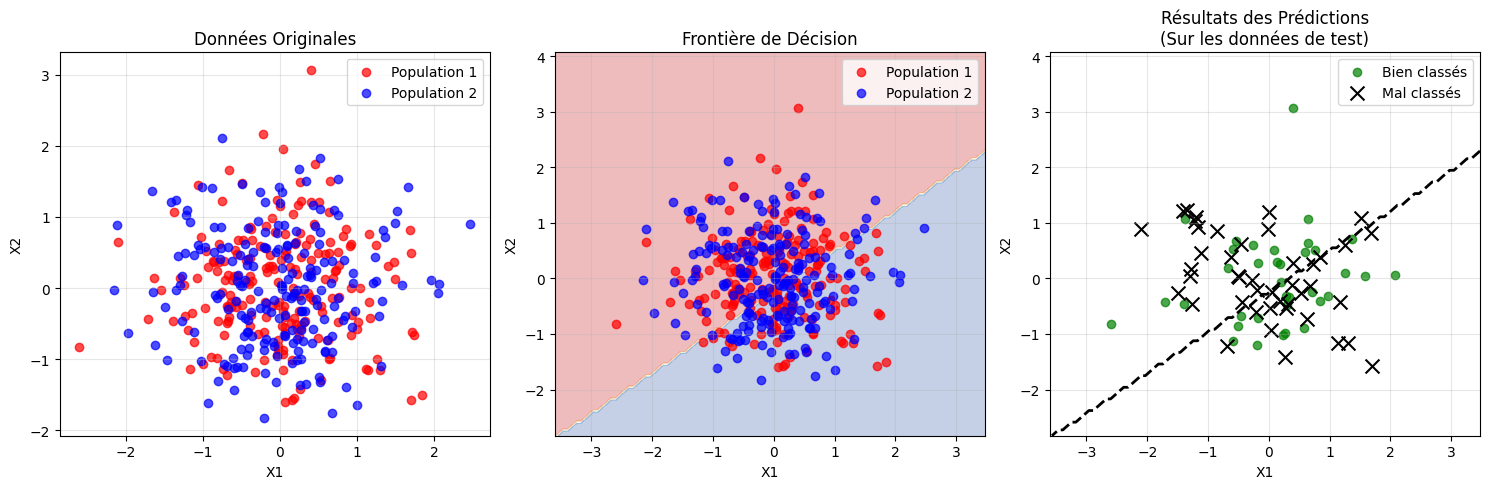


=== COEFFICIENTS DU MODÈLE ===
Intercept (biais): -0.023
Coefficient pour X1: 0.068
Coefficient pour X2: -0.093

=== ÉQUATION DE LA FRONTIÈRE ===
0.068*X1 + -0.093*X2 + -0.023 = 0

=== EXEMPLE DE PROBABILITÉS ===
Quelques prédictions avec leurs probabilités:
Point 1: Classe réelle = 0, Prédiction = 0
  Probabilités: [Classe 0: 0.525, Classe 1: 0.475]
Point 2: Classe réelle = 0, Prédiction = 1
  Probabilités: [Classe 0: 0.468, Classe 1: 0.532]
Point 3: Classe réelle = 0, Prédiction = 1
  Probabilités: [Classe 0: 0.489, Classe 1: 0.511]
Point 4: Classe réelle = 1, Prédiction = 1
  Probabilités: [Classe 0: 0.481, Classe 1: 0.519]
Point 5: Classe réelle = 0, Prédiction = 1
  Probabilités: [Classe 0: 0.440, Classe 1: 0.560]


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Génération de deux populations bien séparées
X, y = make_blobs(
    n_samples=400,       # nombre total d'échantillons
    centers=[[-0.01, -0.01], [0.01,0.01]],  # positions des centres
    cluster_std=0.8,     # écart-type (plus petit = plus séparé)
    random_state=42
)

# Division en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
print("=== RAPPORT DE CLASSIFICATION ===")
print(classification_report(y_test, y_pred))

print("=== MATRICE DE CONFUSION ===")
print(confusion_matrix(y_test, y_pred))

print(f"\n=== PRÉCISION GLOBALE ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Visualisation des résultats
plt.figure(figsize=(15, 5))

# Graphique 1: Données originales
plt.subplot(1, 3, 1)
plt.scatter(X[y==0, 0], X[y==0, 1], c="red", label="Population 1", alpha=0.7)
plt.scatter(X[y==1, 0], X[y==1, 1], c="blue", label="Population 2", alpha=0.7)
plt.legend()
plt.title("Données Originales")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True, alpha=0.3)

# Graphique 2: Frontière de décision
plt.subplot(1, 3, 2)
# Création d'une grille pour la frontière de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prédictions sur la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracé de la frontière de décision
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[y==0, 0], X[y==0, 1], c="red", label="Population 1", alpha=0.7)
plt.scatter(X[y==1, 0], X[y==1, 1], c="blue", label="Population 2", alpha=0.7)
plt.legend()
plt.title("Frontière de Décision")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True, alpha=0.3)

# Graphique 3: Prédictions vs Réalité
plt.subplot(1, 3, 3)
# Points bien classés et mal classés
correct_mask = (y_pred == y_test)
incorrect_mask = ~correct_mask

plt.scatter(X_test[correct_mask, 0], X_test[correct_mask, 1],
           c="green", label="Bien classés", alpha=0.7)
plt.scatter(X_test[incorrect_mask, 0], X_test[incorrect_mask, 1],
           c="black", marker="x", s=100, label="Mal classés")

# Tracé de la frontière de décision
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')

plt.legend()
plt.title("Résultats des Prédictions\n(Sur les données de test)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Affichage des coefficients du modèle
print("\n=== COEFFICIENTS DU MODÈLE ===")
print(f"Intercept (biais): {model.intercept_[0]:.3f}")
print(f"Coefficient pour X1: {model.coef_[0][0]:.3f}")
print(f"Coefficient pour X2: {model.coef_[0][1]:.3f}")

# Équation de la frontière de décision
print(f"\n=== ÉQUATION DE LA FRONTIÈRE ===")
print(f"{model.coef_[0][0]:.3f}*X1 + {model.coef_[0][1]:.3f}*X2 + {model.intercept_[0]:.3f} = 0")

# Probabilités de prédiction pour quelques exemples
print(f"\n=== EXEMPLE DE PROBABILITÉS ===")
print("Quelques prédictions avec leurs probabilités:")
for i in range(5):
    proba = model.predict_proba([X_test[i]])[0]
    print(f"Point {i+1}: Classe réelle = {y_test[i]}, Prédiction = {y_pred[i]}")
    print(f"  Probabilités: [Classe 0: {proba[0]:.3f}, Classe 1: {proba[1]:.3f}]")

ReLU: Accuracy = 1.000
Sigmoid: Accuracy = 0.988


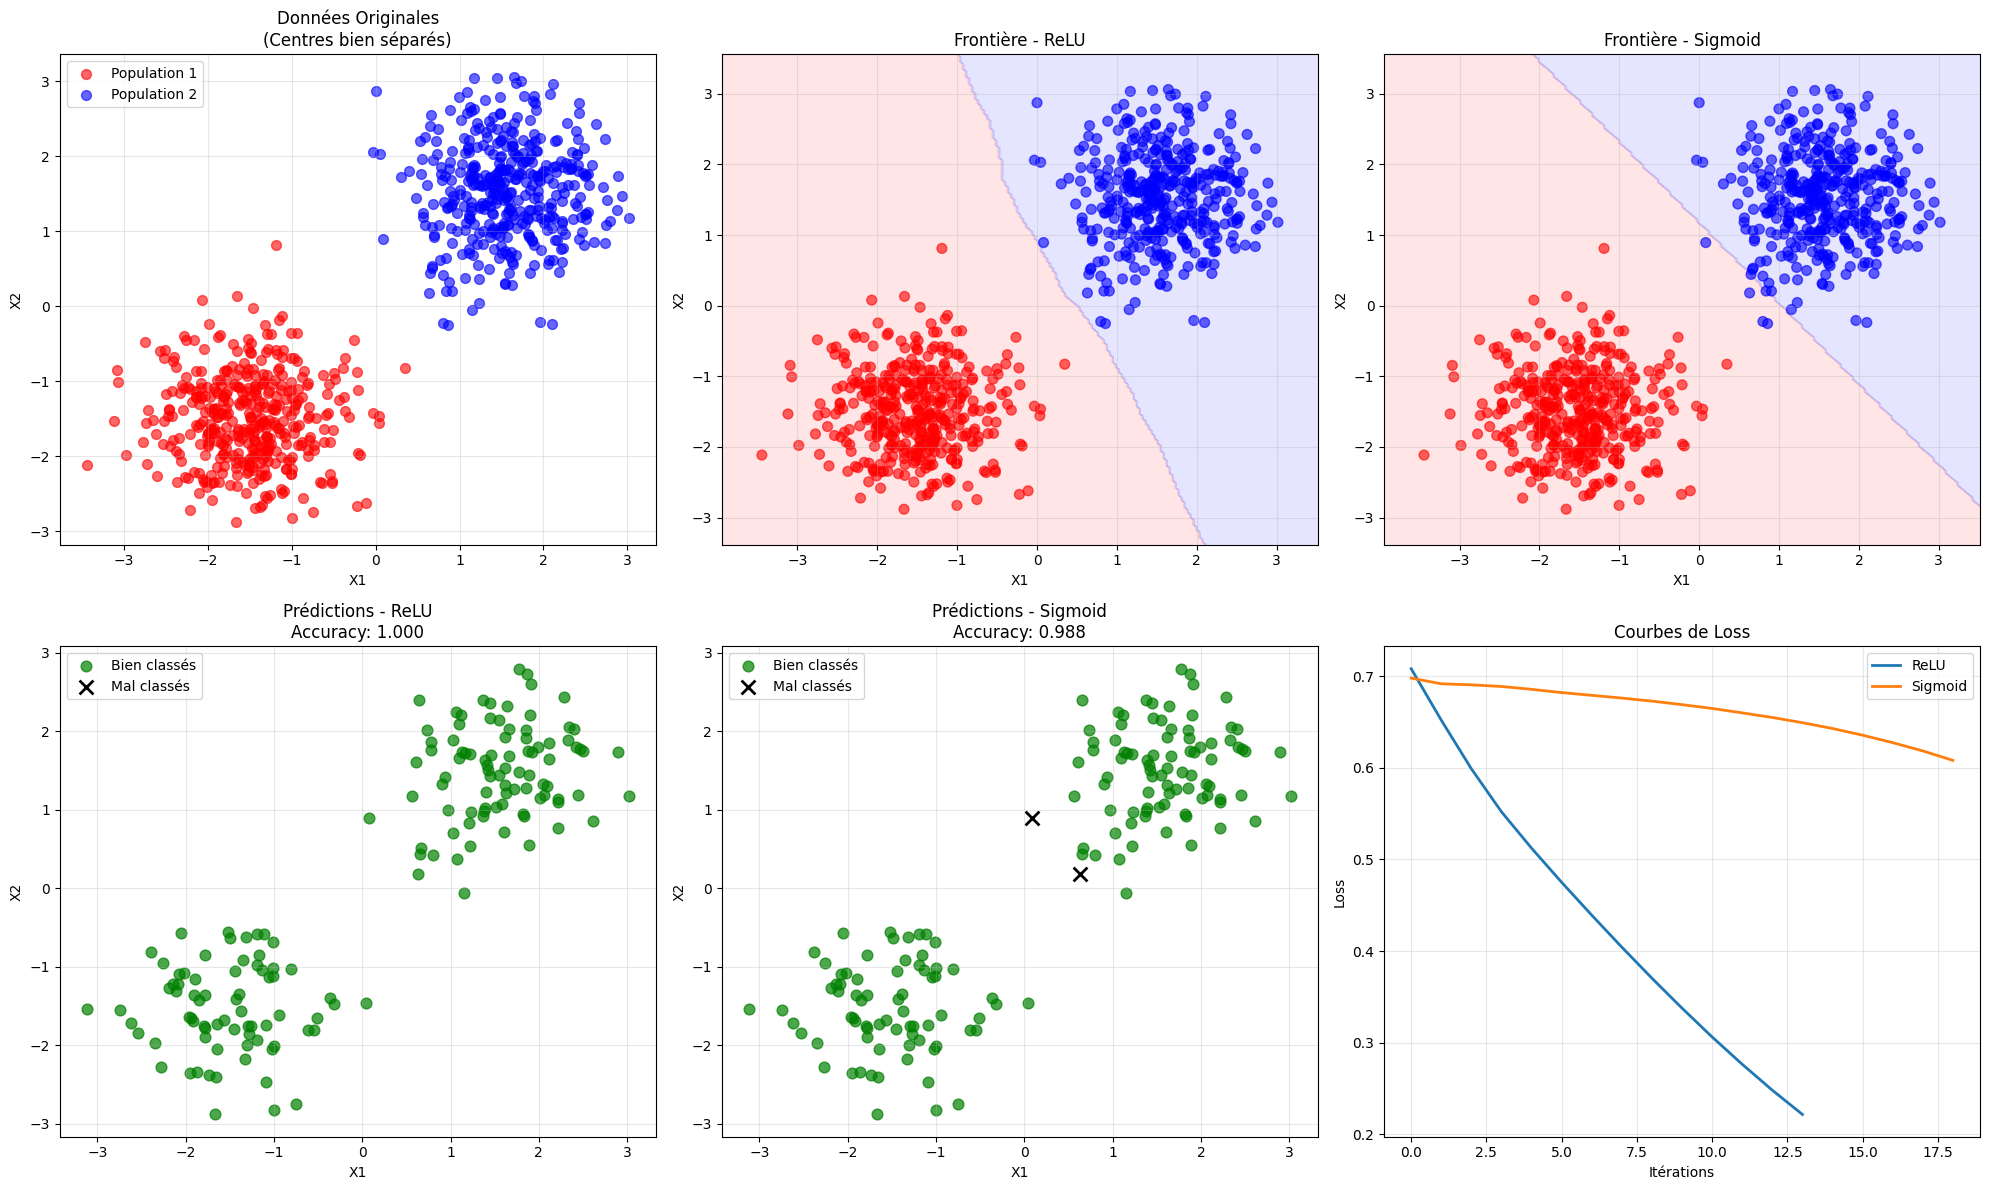

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Données avec bonne séparabilité
X, y = make_blobs(
    n_samples=800,  # Plus d'échantillons
    centers=[[-1.5, -1.5], [1.5, 1.5]],  # Distance raisonnable
    cluster_std=0.6,  # Variance modérée
    random_state=42
)

# Normalisation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèles optimisés
models = {
    'ReLU': MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        learning_rate_init=0.001,
        max_iter=2000,
        early_stopping=True,
        random_state=42
    ),
    'Sigmoid': MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation='logistic',
        solver='adam',
        alpha=0.0001,
        learning_rate_init=0.001,
        max_iter=2000,
        early_stopping=True,
        random_state=42
    )
}

# Entraînement et évaluation
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'model': model, 'accuracy': accuracy, 'predictions': y_pred}
    print(f"{name}: Accuracy = {accuracy:.3f}")

# Visualisation améliorée
plt.figure(figsize=(20, 12))

# Graphique 1: Données originales
plt.subplot(2, 3, 1)
plt.scatter(X[y==0, 0], X[y==0, 1], c="red", label="Population 1", alpha=0.6, s=50)
plt.scatter(X[y==1, 0], X[y==1, 1], c="blue", label="Population 2", alpha=0.6, s=50)
plt.title("Données Originales\n(Centres bien séparés)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True, alpha=0.3)

# Fonction pour tracer les frontières
def plot_decision_boundary(model, X, y, title, position):
    plt.subplot(2, 3, position)

    # Création de la grille
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Prédictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_scaled = scaler.transform(grid_points)
    Z = model.predict(grid_points_scaled)
    Z = Z.reshape(xx.shape)

    # Contour
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, alpha=0.6, s=50)
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True, alpha=0.3)

# Frontières de décision
plot_decision_boundary(results['ReLU']['model'], X, y, "Frontière - ReLU", 2)
plot_decision_boundary(results['Sigmoid']['model'], X, y, "Frontière - Sigmoid", 3)

# Prédictions
for i, (name, result) in enumerate(results.items(), 4):
    plt.subplot(2, 3, i)

    correct = (result['predictions'] == y_test)
    incorrect = ~correct

    plt.scatter(X_test[correct, 0], X_test[correct, 1],
               c='green', label='Bien classés', alpha=0.7, s=60)
    plt.scatter(X_test[incorrect, 0], X_test[incorrect, 1],
               c='black', marker='x', s=100, label='Mal classés', linewidth=2)

    plt.title(f"Prédictions - {name}\nAccuracy: {result['accuracy']:.3f}")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True, alpha=0.3)

# Courbes de loss
plt.subplot(2, 3, 6)
plt.plot(results['ReLU']['model'].loss_curve_, label='ReLU', linewidth=2)
plt.plot(results['Sigmoid']['model'].loss_curve_, label='Sigmoid', linewidth=2)
plt.xlabel('Itérations')
plt.ylabel('Loss')
plt.title('Courbes de Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# b

In [18]:
# data
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
# set data params
np.random.seed(0)
num_pts = 600
noise_val = 0.25

# generate data
# X = 2D points, Y = class labels (0 or 1)
X, Y = make_moons(num_pts, noise=noise_val)

# Split into test and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
    test_size=0.25, random_state=1)

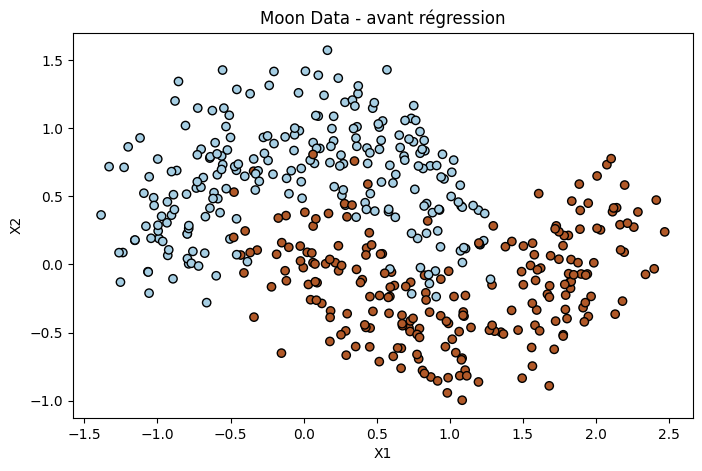

In [26]:
# Génération des données
np.random.seed(0)
num_pts = 600
noise_val = 0.25
X, Y = make_moons(num_pts, noise=noise_val)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# Visualisation des données avant régression
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.Paired, edgecolor='k')
plt.title('Moon Data - avant régression')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9264 - loss: 0.1577
Accuracy sur test set: 0.91
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


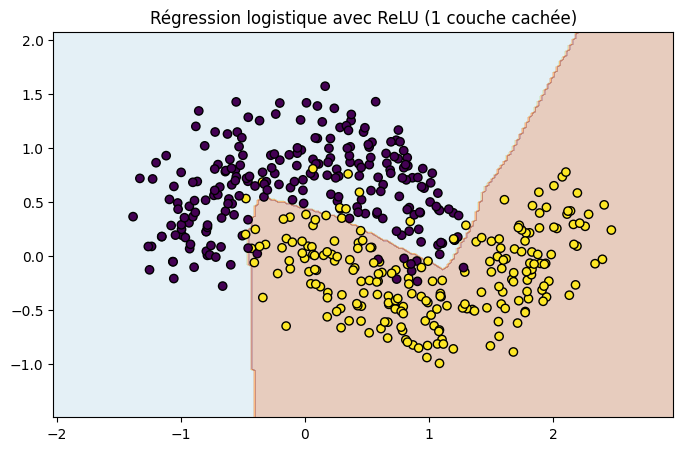

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Génération des données
np.random.seed(0)
num_pts = 600
noise_val = 0.25
X, Y = make_moons(num_pts, noise=noise_val)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# Création du modèle
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # couche cachée avec ReLU
    Dense(1, activation='sigmoid')                   # sortie pour classification binaire
])

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement
history = model.fit(X_train, Y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Évaluation
loss, acc = model.evaluate(X_test, Y_test)
print(f'Accuracy sur test set: {acc:.2f}')

# Visualisation des frontières de décision
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int).reshape(xx.shape)

plt.figure(figsize=(8,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, edgecolor='k')
plt.title('Régression logistique avec ReLU (1 couche cachée)')
plt.show()
